
## Clasificación usando árboles de decisión

by: Orlando *Motenegro Reyes and Andrés M. Castillo*

**Universidad del Valle**

Para el desarrollo de esta actividad se usará base de datos de Cleveland que se refiere a la presencia de enfermedad cardíaca en el paciente.

Es posible encontrar tendencias en los datos del corazón para predecir ciertos eventos cardiovasculares o encontrar indicaciones claras de la salud del corazón.

### 1. Librerias python

Se procede al llamado de las librerias python requeridas para desarrollar la tarea

In [1]:
# Descomentar en caso de No tener instaladas las librerias
#!conda install -c conda-forge ipywidgets -y
#!conda install -c anaconda graphviz python-graphviz -y
#!conda install -c conda-forge keras -y
#!conda install -c anaconda pydot -y
#!conda install -c anaconda seaborn -y

# importando el modulo numpy
import numpy as np

# importando el modulo pandas
import pandas as pd

# importando el modulo regexp
import re

# importando el modulo matplotlib
import matplotlib.pyplot as plt

#  importando el modulo train_test_split, learning_curve, ShuffleSplit de sklearn.model_selection
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

#  importando el modulo tree de sklearn
from sklearn import tree

#  importando el modulo GaussianNB de sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

#  importando los modulos confusion_matrix, roc_curve, auc, accuracy_score de sklearn.metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

#  importando el modulo HandlerLine2D de matplotlib.legend_handler
from matplotlib.legend_handler import HandlerLine2D

# importando los modulos SVG, display de IPython.display
from IPython.display import SVG, display

# importando el modulo Source de graphviz
from graphviz import Source

# importando el modulo StandardScaler de sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# importando el modulo sns de seaborn
import seaborn as sns

# importando el modulo tensorflow
import tensorflow as tf

# importando el Sequential sns de keras.models
from keras.models import Sequential

# importando los modulos Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense de keras.layers
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

# importando el modulo plot_model de keras.utils.vis_utils
from keras.utils.vis_utils import plot_model

# importando el modulo Image de IPython.display
from IPython.display import Image

# importando el modulo warhing del Sistema Operativo
import warnings

# importando las librerias base del Sistema Operativo
import os

# Desabilitando los mensajes warning de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# funcion que captura los warning
def warn(*args, **kwargs):
    pass

# trigger que captura los warnings del sistema
warnings.warn = warn

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1)

### 2. Descripción de los atributos

| id | Variable | Descripción                                                             |
|:-- |:--       | :--                                                                     |
|1.  | age      | Edad de las personas en años                                            |
|2.  | sex      | Sexo de las personas<br/>0 = mujer<br/>1 = hombre                       |
|3.  | cp       | Dolor en el Pecho experimentado<br/>1: angina típica<br/>2: angina atipica<br/>3: sin dolor anginal<br/>4: asintomatico                                      |
|4.  | trestbps | presión arterial en reposo de la persona (mm Hg al ingreso al hospital) |
|5.  | chol     | Medida de Colesterol en mg/dl                                           |
|6.  | fbs      | Glicemia en Ayunas (> 120 mg/dl)<br/>0 = falso<br/>1 = verdadero        |
|7.  | restecg  | Resultados electrocardiográficos en reposo<br/>0 = normal<br/>1 = tiene una onda ST-T anormal<br/>2 = hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes                                                                        |
|8.  | thalach  | frecuencia cardíaca máxima alcanzada                                    |
|9.  | exang    | angina inducida por ejercicio<br/>0 = no<br/>1 = si                     |
|10. | oldpeak  | Depresión de ST inducida por el ejercicio en relación con el descanso<br/>('ST' se relaciona con las posiciones en la gráfica del ECG)                              |
|11. | slope    | la pendiente del segmento pico ST del ejercicio<br/>1: pendiente ascendente<br/>2: plano<br/>3: pendiente descendente                                      |
|12. | ca       | Número de vasos principales coloreados por flourosopía (0-3)            |
|13. | thal     | un desorden en la sangre llamado thalassemia<br/>3 = normal<br/>6 = defecto fijo<br/>7 = defecto reversible                                                           |
|14. | target   | enfermedad del corazón<br/>0 = no<br/>1 = si                            |

### 3. Carga de datos en Memoria

los datos se deben descargar de los siguientes enlaces:

* [heart-disease-UCI](https://www.kaggle.com/ronitf/heart-disease-uci) 

### 3.1 Dataset Heart

In [2]:
# se crea el dataframe heart y se cargan los datos del archivo
heart        = pd.read_csv("heart.csv")

# Se imprime una pequeña porcion de informacion
display(heart.head())
print('Número de Registros: {:,}'.format(heart.shape[0]))
print('Número de Columnas : {}'.format(heart.shape[1]))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Número de Registros: 303
Número de Columnas : 14


### 3.1.1 Descripcion de los Datos

In [3]:
# Se copia el dataset heart
heartx = heart.copy()

# Se quitan todos lo valores nulo
heartx.dropna(inplace = True)  

# Se hace un llamado al método describe 
desc = heartx.describe() 
  
# se despliega la información
desc 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.1.1.2 Dividir los atributos por tipos(Numéricos/Categóricos)

In [4]:
numericAttributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'];
categAttributes = ['sex', 'fbs', 'restecg', 'exang', 'thal', 'slope', 'ca', 'cp' ];

### 3.1.2 Graficando los Datos

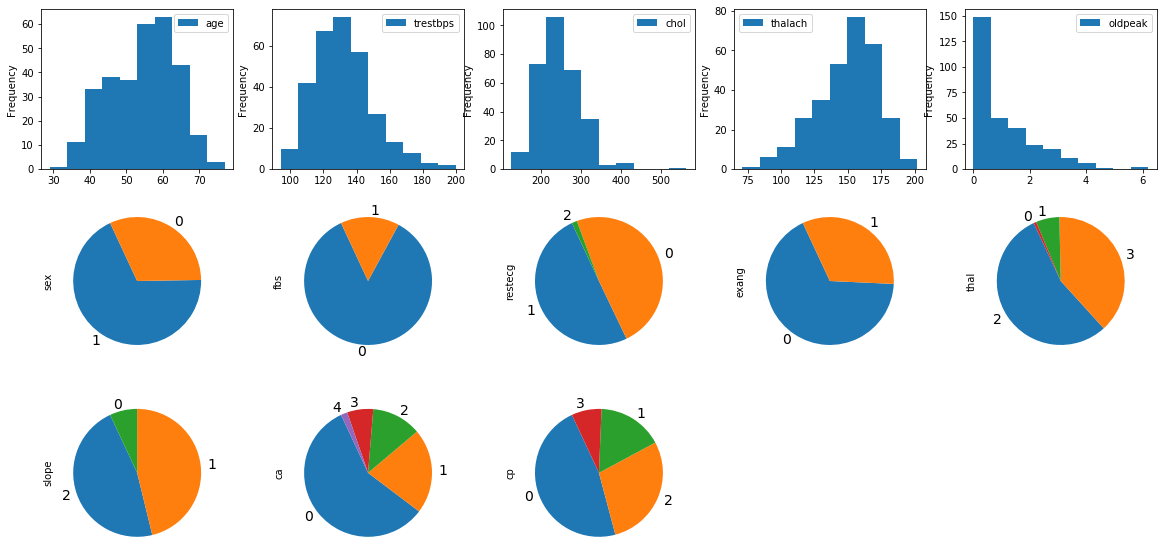

In [5]:
# declarando un objeto tipo Figura para desarrollar los subplots
fig = plt.figure(figsize=(20, 10))

x = 1
# Declarando las graficas de tipo Histograma Variables Númericas
for numAtt in numericAttributes:
    # Grafica de la variable age
    ax = fig.add_subplot(3,5,x)
    heart[[numAtt]].plot(kind='hist', ax=ax, rwidth=1)
    x = x + 1

# Declarando las graficas de tipo Pie para Variables Categoricas
x = 6
for catAtt in categAttributes:
    # Grafica de la Variable sex
    ax = fig.add_subplot(3,5,x)
    heart[catAtt].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=14)
    x = x + 1


plt.show()

### 3.3 Buscando Datos Nulos

### 3.3.1 Revisión por Columnas

In [6]:
print('Datos nulos DataSet heart: {}'.format(heart.isnull().sum().sum()))

Datos nulos DataSet heart: 0


### 3.3.2 Revisión por Filas

In [7]:
df_no_missing = heart.dropna()
print('Número de Registros antes del borrado: {}'.format(heart.shape[0]))
print('Número de Registros despues del borrado: {}'.format(df_no_missing.shape[0]))
print('Porcentaje de Perdida de datos: {:.2f}%'.format(100-(df_no_missing.shape[0]*100)/heart.shape[0]))

Número de Registros antes del borrado: 303
Número de Registros despues del borrado: 303
Porcentaje de Perdida de datos: 0.00%


## 4. Completando Datos Faltantes

### 4.1 Imputacion de datos Númericos

In [8]:
heart['trestbps'] = heart['trestbps'].fillna(heart['trestbps'].median())
heart['chol']     = heart['chol'].fillna(heart['chol'].median())
heart['thalach']  = heart['thalach'].fillna(heart['thalach'].median())
heart['oldpeak']  = heart['oldpeak'].fillna(heart['oldpeak'].mean())

### 4.2 Imputacion de datos Categoricos

In [9]:
heart['fbs']     = heart['fbs'].fillna(heart['fbs'].mode().iloc[0])
heart['restecg'] = heart['restecg'].fillna(heart['restecg'].mode().iloc[0])
heart['exang']   = heart['exang'].fillna(heart['exang'].mode().iloc[0])

display(heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Opción 1: Dividimos los datos en conjuntos de entrenamiento y test

70% para entrenamiento y 30% para test

### Dataset Heart option 1

In [10]:
# Se crea un nuevo array
data_p     = heart.copy()

# se crean las sublcases de las variables categoricas
chest_pain = pd.get_dummies(data_p['cp'], prefix='cp')
sp         = pd.get_dummies(data_p['slope'],prefix='slope')
th         = pd.get_dummies(data_p['thal'],prefix='thal')
rest_ecg   = pd.get_dummies(data_p['restecg'],prefix='restecg')
frames     = [data_p, chest_pain, sp, th, rest_ecg]
data_p     = pd.concat(frames,axis=1)

# se eliminan las columas originales categoricas
data_p.drop(['cp','slope','thal','restecg'],axis=1,inplace=True)

display(data_p.head(5))

target_heart   = data_p.target.values
features_heart = data_p.drop(["target"], axis = 1)

# Normalizacion 
#features_heart = (features_heart - np.min(features_heart)) / 
#                 (np.max(features_heart) - np.min(features_heart)).values 

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0


### Función para Separar el Conjunto de Datos

La función sirve para separar el conjunto de datos en el conjunto de entranamiento y test de manera aleatoria

In [11]:
#  funcion que divide los datos 
def get_data_probe():
    # Se divide el set de datos en dos conjuntos train y test
    trainX_heart, testX_heart, trainY_heart, testY_heart = train_test_split(features_heart, target_heart, 
                                                                            test_size=0.3)
    #print(trainX_heart.shape, trainY_heart.shape)
    #print(testX_heart.shape, testY_heart.shape)
    
    return trainX_heart, testX_heart, trainY_heart, testY_heart


## 5. Árboles de decisión

Entrenamos un modelo de Árbol de decisión

### 5.1 Determinamos la Maxima Profundidad del Árbol

para esta tarea se usa AUC (Area Under Curve) como metrica de evaluación. Nuestro valor target es binario, por lo que es un problema de clasificación binaria. AUC es una buena manera de evaluar este tipo de problemas.

### Dataset Heart


In [12]:
max_depths = np.linspace(1, 40, 40, endpoint=True)

max_depths_train_results = []
max_depths_test_results = []

x_train_depths_heart, x_test_depths_heart, y_train_depths_heart, y_test_depths_heart = get_data_probe()

for mxd in max_depths:
    dt1a = tree.DecisionTreeClassifier(max_depth = mxd)
    
    dt1a.fit(x_train_depths_heart, y_train_depths_heart)
    
    train_pred1a = dt1a.predict(x_train_depths_heart)
    false_positive_rate1a, true_positive_rate1a, thresholds1a = roc_curve(y_train_depths_heart, 
                                                                          train_pred1a)
    roc_auc1a = auc(false_positive_rate1a, true_positive_rate1a)
    
    # Se agrega el auc score a los resultados previos de entrenamiento
    max_depths_train_results.append(roc_auc1a)
    
    y_pred1a = dt1a.predict(x_test_depths_heart)
    false_positive_rate1a, true_positive_rate1a, thresholds1a = roc_curve(y_test_depths_heart, 
                                                                          y_pred1a)
    roc_auc1a = auc(false_positive_rate1a, true_positive_rate1a)

    # Se agrega el auc score a los resultados previos de pruebas
    max_depths_test_results.append(roc_auc1a)

### 5.2 Determinamos el mínimo número de muestras (min_samples_split )

min_samples_split representa el número mínimo de muestras necesarias para dividir un nodo interno. Esto puede variar entre considerar al menos una muestra en cada nodo y considerar todas las muestras en cada nodo. Cuando aumentamos este parámetro, el árbol se vuelve más limitado ya que tiene que considerar más muestras en cada nodo. Aquí variaremos el parámetro del 10% al 100% de las muestras

### Dataset Heart

In [13]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

mss_train_results = []
mss_test_results  = []

x_train_mss_heart = x_train_depths_heart
y_train_mss_heart = y_train_depths_heart

x_test_mss_heart  = x_test_depths_heart
y_test_mss_heart  = y_test_depths_heart

for mss in min_samples_splits:
    dtm1a = tree.DecisionTreeClassifier(min_samples_split = mss)
    
    dtm1a.fit(x_train_mss_heart, y_train_mss_heart)
    
    train_predm1a = dtm1a.predict(x_train_mss_heart)
    false_positive_ratem1a, true_positive_ratem1a, thresholdsm1a = roc_curve(y_train_mss_heart, 
                                                                             train_predm1a)
    roc_aucm1a = auc(false_positive_ratem1a, true_positive_ratem1a)
    
    # Se agrega el auc score a los resultados previos de entrenamiento
    mss_train_results.append(roc_aucm1a)
    
    y_predm1a = dtm1a.predict(x_test_mss_heart)
    false_positive_ratem1a, true_positive_ratem1a, thresholdsm1a = roc_curve(y_test_mss_heart,
                                                                             y_predm1a)
    roc_aucm1a = auc(false_positive_ratem1a, true_positive_ratem1a)

    # Se agrega el auc score a los resultados previos de pruebas
    mss_test_results.append(roc_aucm1a)

### 5. 3 Graficando los Resultados

### Dataset Heart

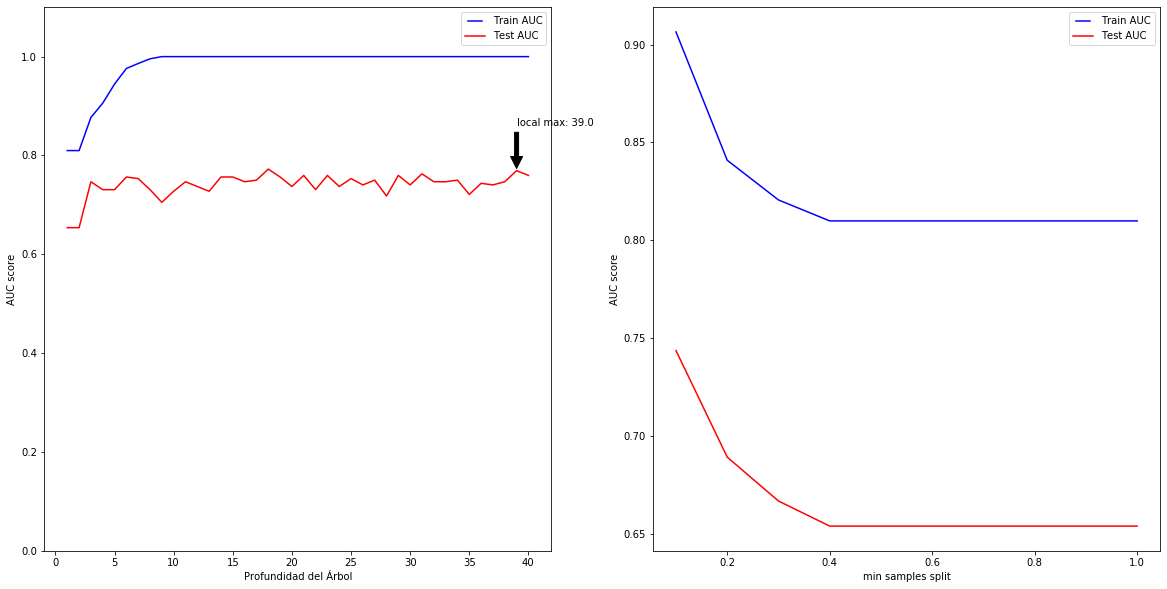

In [14]:
# Se declara el objeto figura 3
fig3 = plt.figure(figsize=(20, 10))

# Se agrega la primera figura al cuadrante 1 correspondiente al max_depth
axg31 = fig3.add_subplot(121)

line1_depth, = axg31.plot(max_depths, max_depths_train_results, 'b', label="Train AUC")
line2_depth, = axg31.plot(max_depths, max_depths_test_results, 'r', label="Test AUC")

# Se halla el valor máximo del array max_depths_test_results
list_depth = max_depths_test_results.copy()
list_depth.sort()

ymax1 = list_depth[-2]
xpos1 = max_depths_test_results.index(ymax1)
xmax1 = max_depths[xpos1]

axg31.annotate('local max: {}'.format(xmax1), xy=(xmax1, ymax1), xytext=(xmax1, ymax1+0.09),
               arrowprops=dict(facecolor='black', shrink=0.05),)

axg31.set_ylim(0,1.1)

axg31.legend(handler_map={line1_depth: HandlerLine2D(numpoints=2)})
axg31.set_ylabel('AUC score')
axg31.set_xlabel('Profundidad del Árbol')

# Se agrega la segunda figura al cuadrante 2 correspondiente al min_samples_split
axg32 = fig3.add_subplot(122)

line1_mss, = axg32.plot(min_samples_splits, mss_train_results, 'b', label="Train AUC")
line2_mss, = axg32.plot(min_samples_splits, mss_test_results, 'r', label="Test AUC")

axg32.legend(handler_map={line1_mss: HandlerLine2D(numpoints=2)})
axg32.set_ylabel('AUC score')
axg32.set_xlabel('min samples split')

plt.show()

### 5.4 Entrenando el modelo

Se procede a entrenar el modelo con los parametros hallados de la evaluación gráfica

### Dataset Heart

In [19]:
# Se Controla el overfitting modificando el "max_depth" y "min_samples_split"
max_depth = 4
min_samples_split = 0.4

# Se crea la matriz de datos para hacer la comparacion con los otros modelos
matrix_data_test_train1 = []
for a in range(0, 10):
    trainX_heart1, testX_heart1, trainY_heart1, testY_heart1 = get_data_probe()
    matrix_data_test_train1.append([trainX_heart1, testX_heart1, trainY_heart1, testY_heart1])

    
# Funcion que entrena un modelo DecisionTreeClassifier
def train_DecisionTreeClassifier(max_depthx, min_samples_splitx, trainX_hrtx, trainY_hrtx):
    model_tree = tree.DecisionTreeClassifier(max_depth = max_depthx, 
                                             min_samples_split = min_samples_splitx, 
                                             random_state = 1)
    return model_tree.fit(trainX_hrtx, trainY_hrtx)
    
# Entrenando el modelo de Prueba
model_tree_heart = train_DecisionTreeClassifier(max_depth, min_samples_split,
                                                      x_train_depths_heart, 
                                                      y_train_depths_heart)

# Creando un dataframe con los score de cada prueba
table_score_model1 = pd.DataFrame(columns=['id_test','tree_score_train', 'tree_score_test'])

for s, d in enumerate(matrix_data_test_train1):
    # get model from de matrix
    model_mat_heart = train_DecisionTreeClassifier(max_depth, min_samples_split, d[0], d[2])
    
    # Get the id of the test
    table_score_model1.loc[s, 'id_test'] = s
    
    # Get the score on the train data
    table_score_model1.loc[s, 'tree_score_train'] = model_mat_heart.score(d[0], d[2])
    
    # Get the score on the test data
    table_score_model1.loc[s, 'tree_score_test'] = model_mat_heart.score(d[1], d[3])

display(table_score_model1.head(10))


#Print the score on the train data
print("Score data train ", table_score_model1['tree_score_train'].mean(),table_score_model1['tree_score_train'].std())

#Print the score on the test data
print("Score data test  ", table_score_model1['tree_score_test'].mean(),table_score_model1['tree_score_test'].std())

#Print the average difference between test and train score

#Print the score on the test data
print("Average difference  ", (abs(table_score_model1['tree_score_train']-table_score_model1['tree_score_test'])).mean())



,id_test,tree_score_train,tree_score_test
0,0,0.792453,0.747253
1,1,0.787736,0.758242
2,2,0.778302,0.78022
3,3,0.759434,0.681319
4,4,0.787736,0.769231
5,5,0.820755,0.681319
6,6,0.820755,0.78022
7,7,0.773585,0.725275
8,8,0.792453,0.648352
9,9,0.825472,0.703297


Score data train  0.7938679245283019 0.022018193354006673
Score data test   0.7274725274725276 0.046852093641961835
Average difference   0.0667789757412399


### 5.4 Matriz de confusión

### Dataset Heart

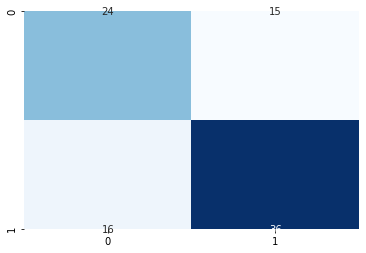

In [21]:
# se hace la prediccion del modelo
train_pred_heart = model_tree_heart.predict(x_test_depths_heart)

# Se crea la matriz de confusión
cm_heart = confusion_matrix(y_test_depths_heart, train_pred_heart.round())
sns.heatmap(cm_heart, annot=True, cmap="Blues", fmt="d", cbar=False)

### 5.5 Gaficando el Modelo

### Dataset Heart

## Option 1

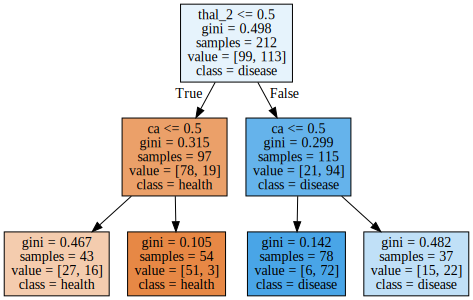

In [22]:
class_names = ["health", "disease"]
features_heart_labels = ["age", "sex", "trestbps", "chol", "fbs", "thalach", "exang", 
                         "oldpeak", "ca", "cp_1",
                         "cp_2", "cp_3", "cp_4", "slope_0", "slope_1", "slope_2", 
                         "thal_0", "thal_1", "thal_2", "thal_3", "restecg_0",
                         "restecg_1", "restecg_2"]

graph = Source(tree.export_graphviz(model_tree_heart, out_file=None,
                                    feature_names=features_heart_labels, 
                                    class_names=class_names, filled = True))

display(SVG(graph.pipe(format='svg')))